In [2]:
import numpy as np
import cv2

In [3]:
img = cv2.imread('test.jpg', 0)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('testgray.jpg', img)

True

In [6]:
cv2.imshow('image', img)
k = cv2.waitKey(0) & 0xFF
if k == 27:
    cv2.destroyAllWindows()
elif k == ord('s'):
    cv2.imwrite('testgray2.png', img)
    cv2.destroyAllWindows()

In [7]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

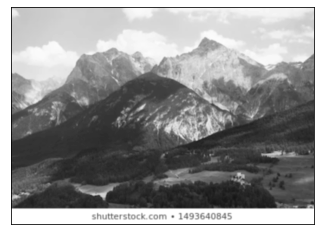

In [8]:
img = cv2.imread('test.jpg', 0)
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

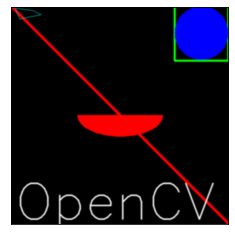

In [9]:
img = np.zeros((512,512, 3), np.uint8)
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))

img = cv2.polylines(img,[pts],True,(0,255,255))
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])
plt.show

In [11]:
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

In [12]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

In [14]:
while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [15]:
drawing = False 
mode = True 
ix,iy = -1,-1

def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
                
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
            
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()

In [ ]:
def nothing(x):
    pass

img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
    
cv2.destroyAllWindows()